In [147]:
import warnings
warnings.filterwarnings('ignore')

In [148]:
import numpy as np
import pandas as pd

In [149]:
bike_rental = pd.read_csv("day.csv")
print(bike_rental.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [150]:
print(bike_rental.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [151]:
print(bike_rental.shape)


(730, 16)


In [152]:
print(bike_rental.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.5448

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# sns.pairplot(bike_rental)
# plt.show()

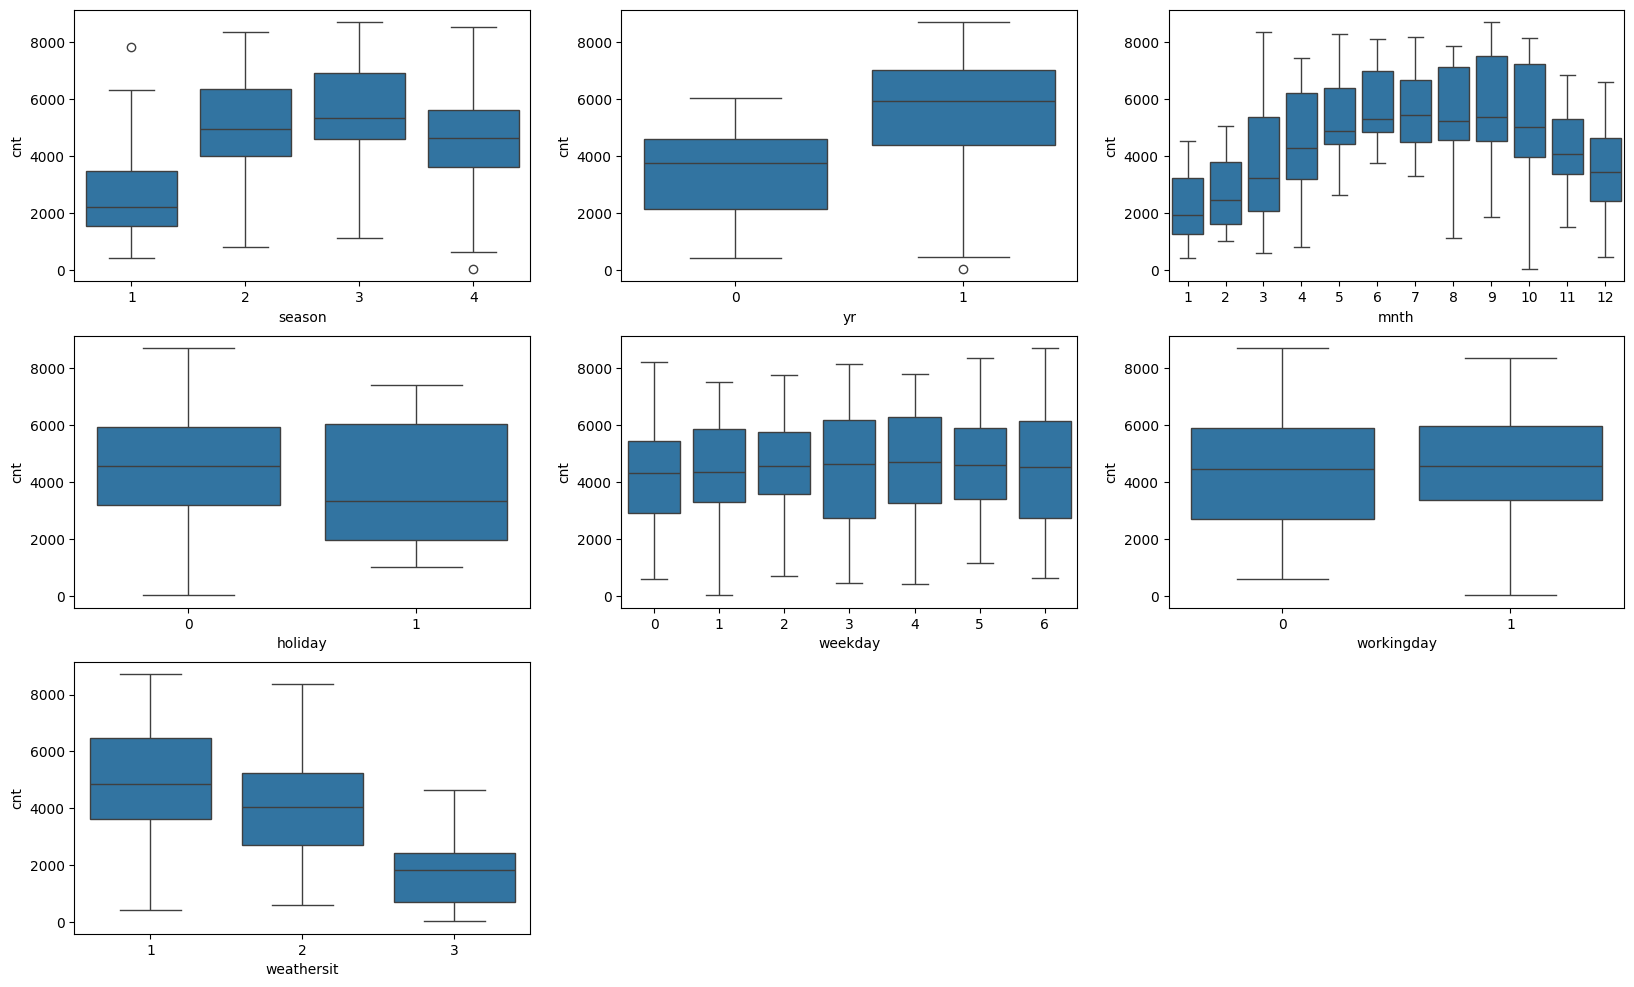

In [154]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_rental)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_rental)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_rental)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_rental)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_rental)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_rental)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_rental)
plt.show()

In [155]:
bike_rental['weathersit'].head()

0    2
1    2
2    1
3    1
4    1
Name: weathersit, dtype: int64

In [156]:
status = pd.get_dummies(bike_rental['weathersit'])
status.head()

,1,2,3
0,False,True,False
1,False,True,False
2,True,False,False
3,True,False,False
4,True,False,False


In [157]:
status = pd.get_dummies(status, drop_first = True)
status

,1,2,3
0,False,True,False
1,False,True,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
725,False,True,False
726,False,True,False
727,False,True,False
728,True,False,False


In [158]:
status.columns = ['cloudy','light_rain', 'heavy_rain']
status.head()

,cloudy,light_rain,heavy_rain
0,False,True,False
1,False,True,False
2,True,False,False
3,True,False,False
4,True,False,False


In [159]:
status = status.astype(int)
status.head()

,cloudy,light_rain,heavy_rain
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [160]:
bike_rental = pd.concat([bike_rental, status], axis = 1)

In [161]:
bike_rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cloudy,light_rain,heavy_rain
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [162]:
bike_rental.drop(['weathersit'],axis = 1, inplace = True)

In [163]:
bike_rental.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,cloudy,light_rain,heavy_rain
0,1,01-01-2018,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0
1,2,02-01-2018,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0
2,3,03-01-2018,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [164]:
status1 = pd.get_dummies(bike_rental['season'],drop_first = True)
status1 = status1.astype(int)
status1.head()

,2,3,4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [165]:
status1.columns = ['summer','fall', 'winter']
status1.head()

,summer,fall,winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [166]:
bike_rental = pd.concat([bike_rental, status1], axis = 1)
bike_rental.drop(['season'],axis = 1, inplace = True)

In [167]:
bike_rental.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,cloudy,light_rain,heavy_rain,summer,fall,winter
0,1,01-01-2018,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,1,0,0,0,0
1,2,02-01-2018,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,1,0,0,0,0
2,3,03-01-2018,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0,0,0,0
3,4,04-01-2018,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0,0,0,0
4,5,05-01-2018,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0,0,0,0


In [168]:
bike_rental.drop(['dteday'],axis = 1, inplace = True)

In [169]:
bike_rental.drop(['instant'],axis = 1, inplace = True)

In [186]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_rental, train_size = 0.7, test_size = 0.3, random_state = 100)

In [187]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [188]:
bike_rental.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'cloudy',
       'light_rain', 'heavy_rain', 'summer', 'fall', 'winter'],
      dtype='object')

In [189]:
num_vars = ['mnth','temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'
       ]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [190]:
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,cloudy,light_rain,heavy_rain,summer,fall,winter
653,1,0.818182,0,2,1,0.509887,0.501133,0.575354,0.300794,0.280402,0.951776,0.864243,1,0,0,0,0,1
576,1,0.545455,0,2,1,0.815169,0.766351,0.725633,0.264686,0.294422,0.899220,0.827658,1,0,0,0,1,0
426,1,0.181818,0,6,0,0.442393,0.438975,0.640189,0.255342,0.290765,0.446145,0.465255,0,1,0,0,0,0
728,1,1.000000,0,0,0,0.245101,0.200348,0.498067,0.663106,0.110332,0.203869,0.204096,1,0,0,0,0,0
482,1,0.272727,0,6,0,0.395666,0.391735,0.504508,0.188475,0.340750,0.444701,0.482973,0,1,0,1,0,0


In [175]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,cloudy,light_rain,heavy_rain,summer,fall,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.504456,0.025490,2.990196,0.676471,0.537262,0.512989,0.650369,0.320768,0.254661,0.523944,0.513620,0.627451,0.343137,0.029412,0.245098,0.262745,0.24902
std,0.500429,0.315338,0.157763,2.017093,0.468282,0.225844,0.212385,0.145882,0.169797,0.206011,0.228175,0.224593,0.483958,0.475223,0.169124,0.430568,0.440557,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.181818,0.000000,1.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.094179,0.353487,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.545455,0.000000,3.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.212740,0.525123,0.518638,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.818182,0.000000,5.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.327415,0.696073,0.684710,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000
max,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


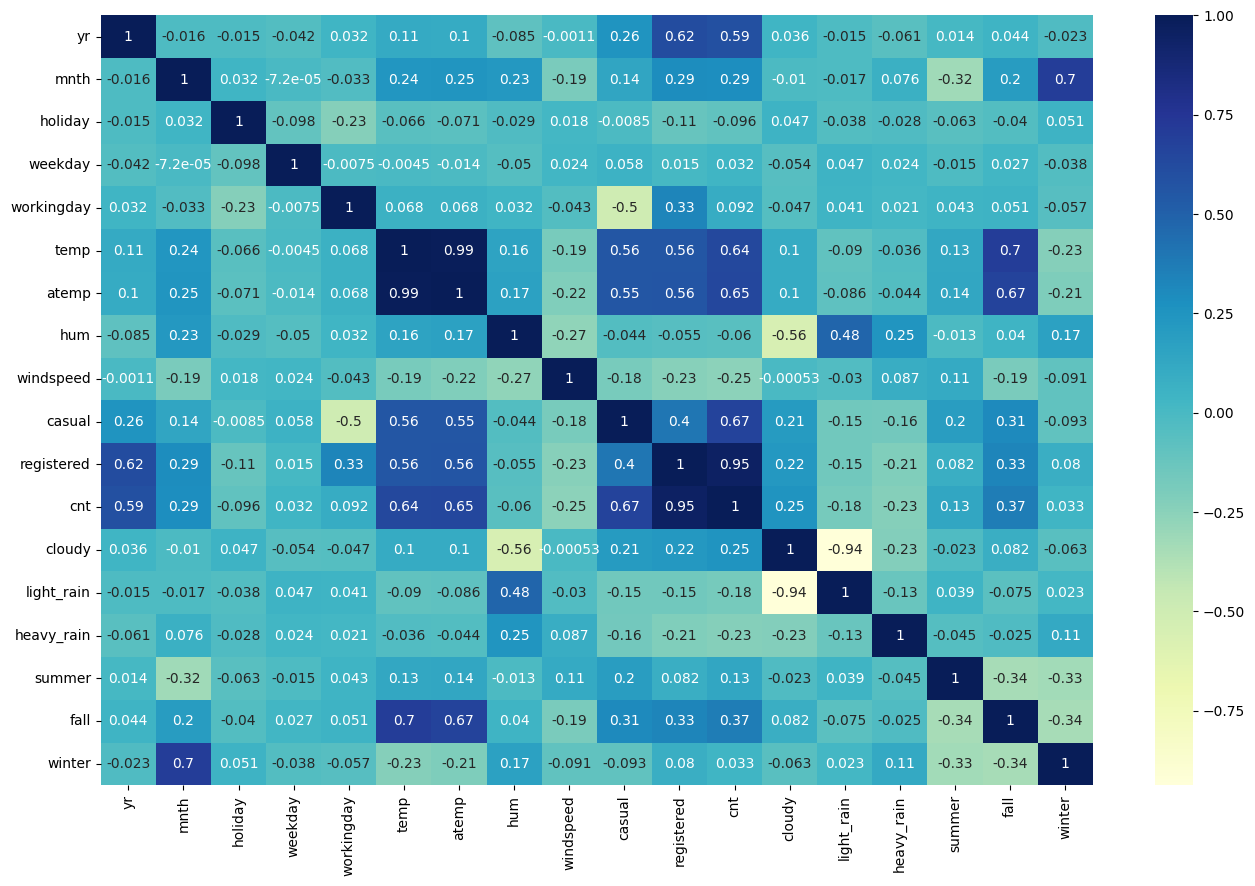

In [176]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

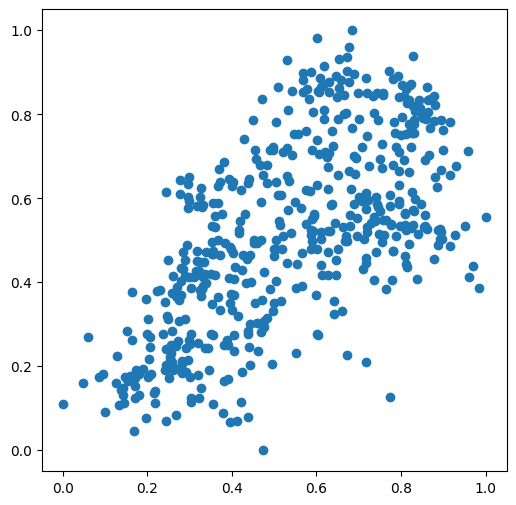

In [191]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [179]:
y_train = df_train.pop('cnt')
X_train = df_train

In [180]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [181]:
lr.params

const    0.169798
temp     0.639952
dtype: float64

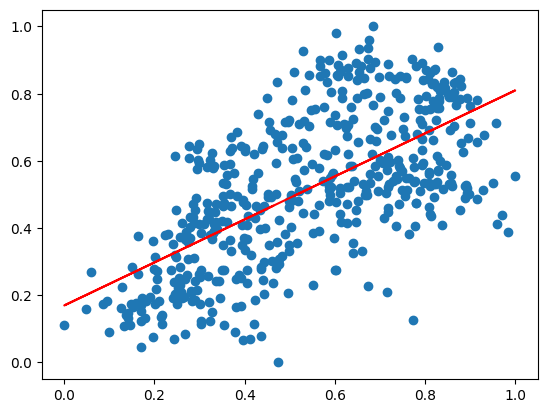

In [182]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169798 + 0.639952*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [183]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 26 Feb 2025   Prob (F-statistic):           5.80e-61
Time:                        15:00:52   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

In [193]:
bike_rental.columns

Index(['yr', 'mnth', 'holiday', 'weekday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'cloudy',
       'light_rain', 'heavy_rain', 'summer', 'fall', 'winter'],
      dtype='object')

In [194]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const         3.408732e-16
yr           -4.250073e-16
mnth         -3.023840e-16
holiday      -1.825796e-16
weekday      -5.281149e-16
workingday   -6.071532e-17
temp          9.749146e-16
atemp        -5.204170e-16
hum           4.597017e-17
windspeed     2.445960e-16
casual        3.774735e-01
registered    7.968247e-01
cloudy        1.220270e-16
light_rain   -5.290907e-17
heavy_rain    2.165965e-16
summer       -2.168404e-17
fall         -3.261280e-16
winter        4.250073e-17
dtype: float64

In [195]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.926e+29
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:06:01   Log-Likelihood:                 16541.
No. Observations:                 510   AIC:                        -3.305e+04
Df Residuals:                     493   BIC:                        -3.298e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.409e-16   5.81e-16      0.587      0.5

In [196]:

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,temp,59.43
6,atemp,53.66
11,cloudy,35.52
12,light_rain,25.59
10,registered,6.98
15,fall,6.22
16,winter,6.03
9,casual,4.01
1,mnth,3.93
13,heavy_rain,3.76


In [200]:
X = X_train.drop('temp', axis=1)

In [201]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [202]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.177e+30
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:09:22   Log-Likelihood:                 16804.
No. Observations:                 510   AIC:                        -3.358e+04
Df Residuals:                     494   BIC:                        -3.351e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.784e-16   3.46e-16      0.804      0.4

In [203]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,cloudy,35.33
11,light_rain,25.49
9,registered,6.96
15,winter,6.03
14,fall,5.83
5,atemp,4.56
8,casual,3.95
1,mnth,3.93
12,heavy_rain,3.76
4,workingday,3.45


In [205]:

# Dropping highly correlated variables and insignificant variables
X = X.drop('cloudy', axis = 1)
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.350e+28
Date:                Wed, 26 Feb 2025   Prob (F-statistic):               0.00
Time:                        15:10:29   Log-Likelihood:                 15664.
No. Observations:                 510   AIC:                        -3.130e+04
Df Residuals:                     494   BIC:                        -3.123e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.669e-16   3.74e-15     -0.098      0.9

In [206]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,registered,43.35
5,atemp,31.21
6,hum,18.30
1,mnth,13.95
4,workingday,10.17
8,casual,9.50
14,winter,7.97
13,fall,7.82
0,yr,6.07
7,windspeed,3.90


In [ ]:

# Dropping highly correlated variables and insignificant variables
X = X.drop('registered', axis = 1)
X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     340.1
Date:                Wed, 26 Feb 2025   Prob (F-statistic):          2.11e-243
Time:                        15:11:12   Log-Likelihood:                 641.00
No. Observations:                 510   AIC:                            -1252.
Df Residuals:                     495   BIC:                            -1188.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0476      0.023      2.059      0.0

In [208]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,atemp,27.82
6,hum,18.26
1,mnth,13.88
8,casual,8.54
12,fall,7.64
13,winter,7.29
4,workingday,6.15
7,windspeed,3.81
11,summer,3.68
3,weekday,3.16
